In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("adult_with_headers.csv", skipinitialspace=True)

# Basic data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

In [1]:
!pip install ppscore


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#pps
import ppscore as pps

In [5]:
pps_matrix = pps.matrix(df)
pps_matrix

C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,income,capital_gain,0.000000,regression,True,mean absolute error,1093.884000,1760.682115,DecisionTreeRegressor()
221,income,capital_loss,0.000000,regression,True,mean absolute error,94.942600,176.261353,DecisionTreeRegressor()
222,income,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,8.097596,DecisionTreeRegressor()
223,income,native_country,0.000000,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()


In [7]:
pps_filtered = pps_matrix[pps_matrix['ppscore'] > 0].sort_values(by='ppscore', ascending=False)
pps_filtered

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
48,education,education,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
208,native_country,native_country,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
192,hours_per_week,hours_per_week,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
176,capital_loss,capital_loss,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
...,...,...,...,...,...,...,...,...,...
106,relationship,workclass,1.541985e-07,classification,True,weighted F1,0.579088,0.579088,DecisionTreeClassifier()
211,income,workclass,1.541985e-07,classification,True,weighted F1,0.579088,0.579088,DecisionTreeClassifier()
46,education,workclass,1.541985e-07,classification,True,weighted F1,0.579088,0.579088,DecisionTreeClassifier()
136,sex,workclass,1.541985e-07,classification,True,weighted F1,0.579088,0.579088,DecisionTreeClassifier()


In [8]:
print(pps_filtered[['x', 'y', 'ppscore']].head(10))

                  x               y  ppscore
0               age             age      1.0
48        education       education      1.0
208  native_country  native_country      1.0
192  hours_per_week  hours_per_week      1.0
176    capital_loss    capital_loss      1.0
160    capital_gain    capital_gain      1.0
144             sex             sex      1.0
128            race            race      1.0
112    relationship    relationship      1.0
80   marital_status  marital_status      1.0


In [10]:
#creating pivot table
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')
pps_pivot

y,age,capital_gain,capital_loss,education,education_num,fnlwgt,hours_per_week,income,marital_status,native_country,occupation,race,relationship,sex,workclass
x,,,,,,,,,,,,,,,
age,1.000000,0.0,0.0,0.052315,0.000000,0.0,0.0,0.005415,0.298118,0.000000,0.027007,1.747134e-07,0.199205,0.000000,1.123161e-02
capital_gain,0.003296,1.0,0.0,0.000000,0.012555,0.0,0.0,0.297123,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
capital_loss,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.141755,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
education,0.016926,0.0,0.0,1.000000,1.000000,0.0,0.0,0.243135,0.092967,0.064488,0.064254,1.747134e-07,0.009952,0.000000,1.541985e-07
education_num,0.016926,0.0,0.0,1.000000,1.000000,0.0,0.0,0.243135,0.092967,0.064488,0.064254,1.747134e-07,0.009952,0.000000,1.541985e-07
fnlwgt,0.000000,0.0,0.0,0.005346,0.000000,1.0,0.0,0.000000,0.032551,0.000000,0.000000,0.000000e+00,0.036790,0.090438,0.000000e+00
hours_per_week,0.002377,0.0,0.0,0.053845,0.000000,0.0,1.0,0.047278,0.122036,0.000000,0.035942,4.591198e-03,0.086839,0.139400,2.244163e-02
income,0.034161,0.0,0.0,0.017605,0.028055,0.0,0.0,1.000000,0.173891,0.000000,0.000000,1.747134e-07,0.105023,0.000000,1.541985e-07
marital_status,0.201582,0.0,0.0,0.036383,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.747134e-07,0.377125,0.312799,1.541985e-07


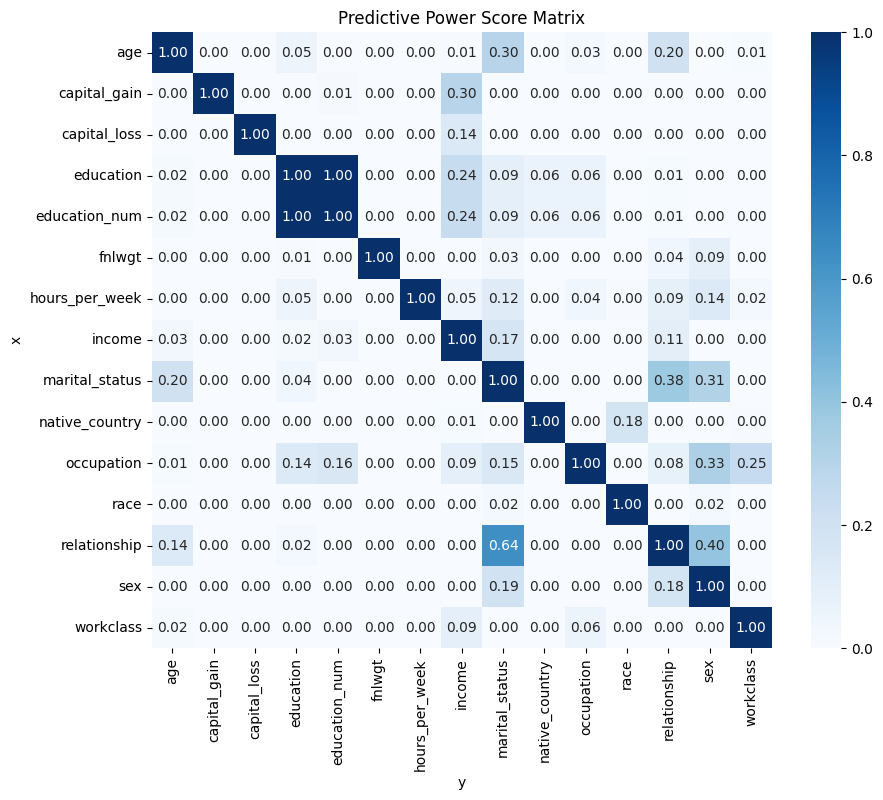

In [12]:
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Predictive Power Score Matrix")
plt.show()

In [14]:
#correlation
correlation = df.corr(numeric_only=True)
correlation

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


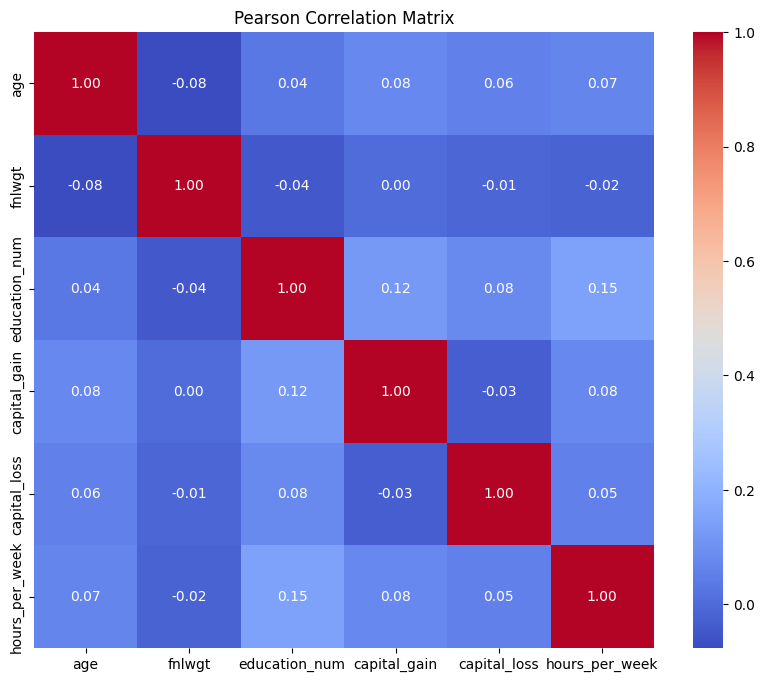

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

In [3]:
df.dropna(inplace=True)

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
num_cols = df.select_dtypes(include='number').columns #numerical columns

In [7]:
# Standardised Scaling (used when data is normally distributed)
std_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = std_scaler.fit_transform(df_std_scaled[num_cols])

In [9]:
# Min-Max kind of Scaling (when data ranged between 0-1)
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df_minmax_scaled[num_cols])

In [10]:
#encoding(label)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() <= 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)  # One-hot
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])

In [13]:
#feature engineering
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'above_avg_hours']


In [14]:
df['above_avg_hours'] = (df['hours_per_week'] > df['hours_per_week'].mean()).astype(int)

In [16]:
df_encoded['capital_net'] = df['capital_gain'] - df['capital_loss']

In [17]:
df_encoded['log_fnlwgt'] = np.log1p(df['fnlwgt'])

In [24]:
#feature selection
from sklearn.feature_selection import mutual_info_classif

#removing outliers
df_no_outliers = df.copy()  

                              Feature  MI Score
31  marital_status_Married-civ-spouse  0.109021
3                        capital_gain  0.080762
0                                 age  0.070167
2                       education_num  0.063894
33       marital_status_Never-married  0.063428
5                      hours_per_week  0.042908
52             relationship_Own-child  0.036850
4                        capital_loss  0.035568
1                              fnlwgt  0.033189
6                     above_avg_hours  0.032118


In [25]:
#Separate features and target
X = df_no_outliers.drop("income", axis=1)
y = df_no_outliers["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [29]:
#categorical data encoding
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,above_avg_hours,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
#computing scores
mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto')
mi_scores

array([7.04472670e-02, 3.34871528e-02, 6.55799281e-02, 8.11426997e-02,
       3.23423412e-02, 4.31801242e-02, 2.72992603e-02, 0.00000000e+00,
       2.53267525e-03, 0.00000000e+00, 2.04063039e-03, 9.81678417e-03,
       7.01515502e-04, 1.09720333e-03, 4.50774344e-04, 4.51506413e-03,
       2.08121491e-03, 2.97244091e-03, 0.00000000e+00, 4.00850296e-03,
       2.18058894e-03, 0.00000000e+00, 0.00000000e+00, 1.36166975e-02,
       5.70346512e-03, 6.95467628e-03, 1.46508175e-02, 1.64806553e-03,
       1.27779788e-02, 0.00000000e+00, 4.50594606e-04, 1.07765134e-01,
       2.44258034e-03, 6.11436178e-02, 5.66092345e-03, 5.34585263e-03,
       3.19998664e-03, 0.00000000e+00, 0.00000000e+00, 1.96090630e-02,
       1.81540186e-03, 2.52193170e-03, 9.34149893e-04, 1.68512903e-02,
       1.00320226e-03, 1.21634210e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.40249858e-03, 2.15717192e-02, 7.78994948e-03,
       3.52367950e-02, 1.36638801e-02, 6.87003737e-03, 0.00000000e+00,
      

In [28]:
#top 10 features
mi_df = pd.DataFrame({"Feature": X_encoded.columns, "MI Score": mi_scores})
top_features = mi_df.sort_values(by="MI Score", ascending=False).head(10)
print(top_features)

                              Feature  MI Score
31  marital_status_Married-civ-spouse  0.107934
3                        capital_gain  0.084068
2                       education_num  0.069929
0                                 age  0.064812
33       marital_status_Never-married  0.062133
5                      hours_per_week  0.043505
52             relationship_Own-child  0.035952
4                        capital_loss  0.034742
1                              fnlwgt  0.033505
59                           sex_Male  0.029846
